## Sentiment Analysis of the Safaricom Android Appication

Traditionally to know how you google play store app is doing, you would have to rely only on the reviews.
In this exercise we are going to use sentiment analysis to augment the other data you get from the playstore and platforms like firebase to give additional context.

### Executive Summary
There are more positive reviews than neutral or negative ones.Also, there is some correlation between sentiments and reviews in the play store. The latest version has an average review of **4.3/5** and an average sentiment score of **0.4/1**. The average app reviews (**4.48**) and sentiments (**0.42**) started on high note in **2023** and began to drop until the start of *Q4* when it started to pick up again.

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/safaricom-android-app-reviews/safaricom_app_reviews.csv


In [51]:
# !mkdir /kaggle/working/training/safaricom-android-app-reviews

In [52]:
# !pip install google-play-scraper
# from google_play_scraper import app
# from google_play_scraper import Sort, reviews_all
# app_name = "Safaricom"
# app_id = "com.safaricom.mysafaricom"
# # app_id = "com.kopokopo.kopo"
# # app_id = "com.kredoh.app"
# us_reviews = reviews_all(
#     app_id,
#     sleep_milliseconds=0, # defaults to 0
#     lang='en', # defaults to 'en'
#     country='ke', # defaults to 'us'
#     sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
# )
# type(us_reviews)
# df_busu = pd.DataFrame(np.array(us_reviews),columns=['review'])
# df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.to_csv('/kaggle/working/training/safaricom-android-app-reviews/safaricom_app_reviews.csv')

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import json
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

# Sentiment Analysis of the Safaricom Android App
We are going to be performing sentiment analysis for the customer reviews on the Google Play Store and see if anything is interesting.

In [54]:
# df_busu = pd.read_csv('/content/drive/My Drive/ColabNotebooks/safaricom_android_app/data/safaricom_app_reviews.csv')
df_busu = pd.read_csv('/kaggle/working/training/safaricom-android-app-reviews/safaricom_app_reviews.csv')
# df_busu = pd.DataFrame(np.array(us_reviews),columns=['review'])
# df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,2b05b290-da7f-41ce-bc8d-1436fa14a623,christopher mulwa,https://play-lh.googleusercontent.com/a/ACg8oc...,Fab,5,0,NaN,2023-11-22 08:04:28,NaN,NaN,NaN
1,1,e267bf98-2546-498e-9d1c-ee6631eb93b9,Me Me,https://play-lh.googleusercontent.com/a-/ALV-U...,very good,5,0,1.20.1.10,2023-11-22 06:44:38,NaN,NaN,1.20.1.10
2,2,562388ee-0b68-4fe7-9eca-6ca8934880e5,Meshack Mateni,https://play-lh.googleusercontent.com/a-/ALV-U...,"the best app, talk about one stop shop for eve...",5,0,1.20.2.3,2023-11-22 05:58:19,NaN,NaN,1.20.2.3
3,3,3146e370-644b-4843-aca6-db7cd45c0930,BENEDETTE WAFULA,https://play-lh.googleusercontent.com/a/ACg8oc...,This app is woow....no adds ......I love it..,5,0,1.20.2.3,2023-11-22 05:13:50,NaN,NaN,1.20.2.3
4,4,04ffa748-6475-4cad-bfc0-cbd7d0ad92ed,DANSON KAMAU,https://play-lh.googleusercontent.com/a/ACg8oc...,perfect,5,0,1.20.2.3,2023-11-22 04:20:01,NaN,NaN,1.20.2.3


In [55]:
df_busu.shape

(39948, 12)

In [56]:
content = df_busu['content'].shape

The image below shows there are more positive reviews than neutral and negative reviews.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


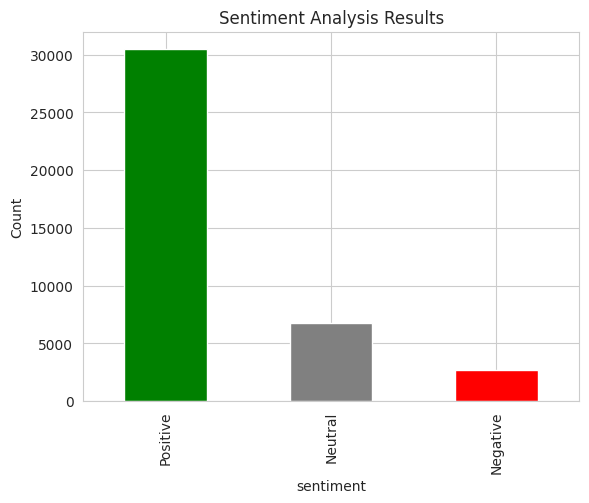

In [57]:
# Download VADER lexicon if you haven't already
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()


def get_sentiment_score(text):
    sentiment_scores = analyzer.polarity_scores(str(text))
    return sentiment_scores['compound']

# Function to determine sentiment label
def get_sentiment(text):
    value = get_sentiment_score(text)

    if value >= 0.05:
        return "Positive"
    elif value <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to the 'TextData' column and create a new 'Sentiment' column
df_busu['sentiment'] = df_busu['content'].apply(get_sentiment)
df_busu['sentiment_val'] = df_busu['content'].apply(get_sentiment_score)

# Group the data by sentiment and count the occurrences
sentiment_counts = df_busu['sentiment'].value_counts()

# Create a bar graph to visualize sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.show()

Positive words


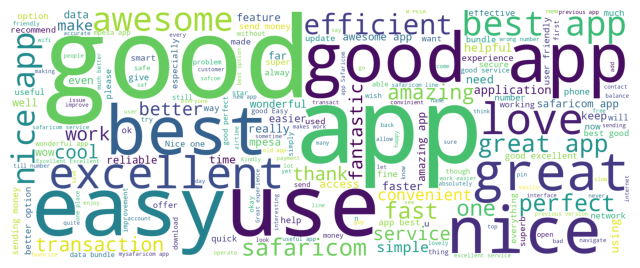

Negative words


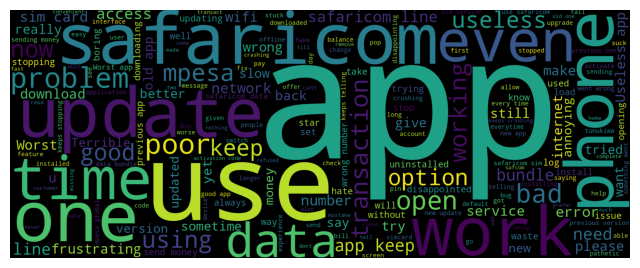

In [58]:
def wordcloud_draw(df2, color = 'black'):
    words = ' '.join(df2['content'])
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2000,
                      height=800
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(8, 40))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
train_pos = df_busu[df_busu['sentiment'] == 'Positive']
train_neg = df_busu[df_busu['sentiment'] == 'Negative']
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [59]:
# @title
# Convert the 'time' column to datetime
df_busu['time'] = pd.to_datetime(df_busu['at'])
# Filter the DataFrame for dates >= '2022-09'
df_busu = df_busu[df_busu['time'] >= '2022-01-01']

In [60]:
df_busu['month'] = df_busu['time'].dt.strftime("%B")
df_busu['month_num'] = df_busu['time'].dt.month
df_busu['year'] = df_busu['time'].dt.strftime("%Y")
df_busu['month_year'] = df_busu['time'].dt.to_period("M")

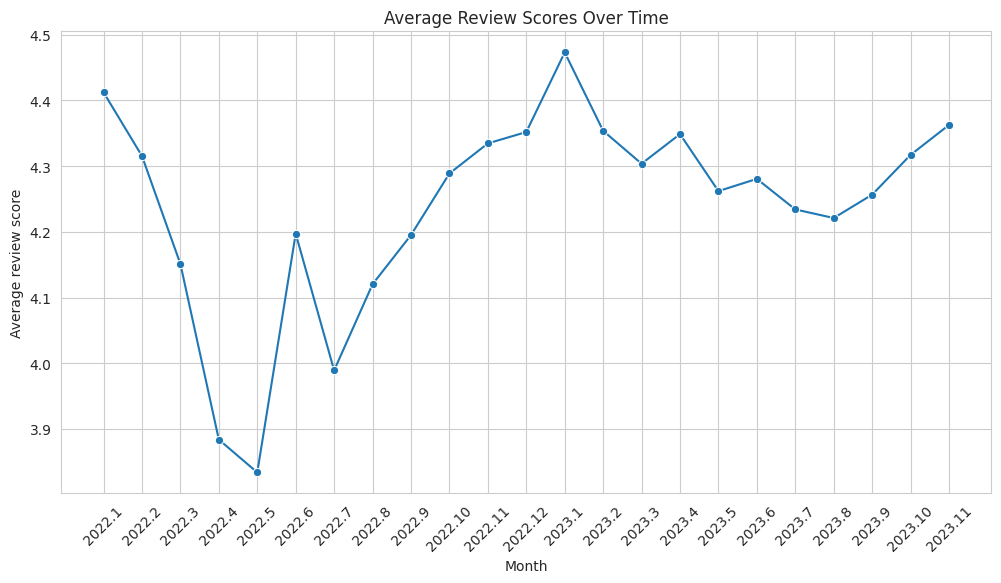

In [61]:
# Group by unique months in each year and calculate the mean score
grouped_df = df_busu.groupby([df_busu['year'], df_busu['month_num']])['score'].mean().reset_index()
grouped_df['year_month'] = grouped_df['year'].astype(str)+"."+grouped_df['month_num'].astype(str)
# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='score', data=grouped_df, marker='o')

plt.xlabel('Month')
plt.ylabel('Average review score')
plt.title('Average Review Scores Over Time')
plt.xticks(rotation=45)

plt.show()

Interestingly the mean sentiment score seems to have some kind of correlation with the reviews on the Google Play Store.

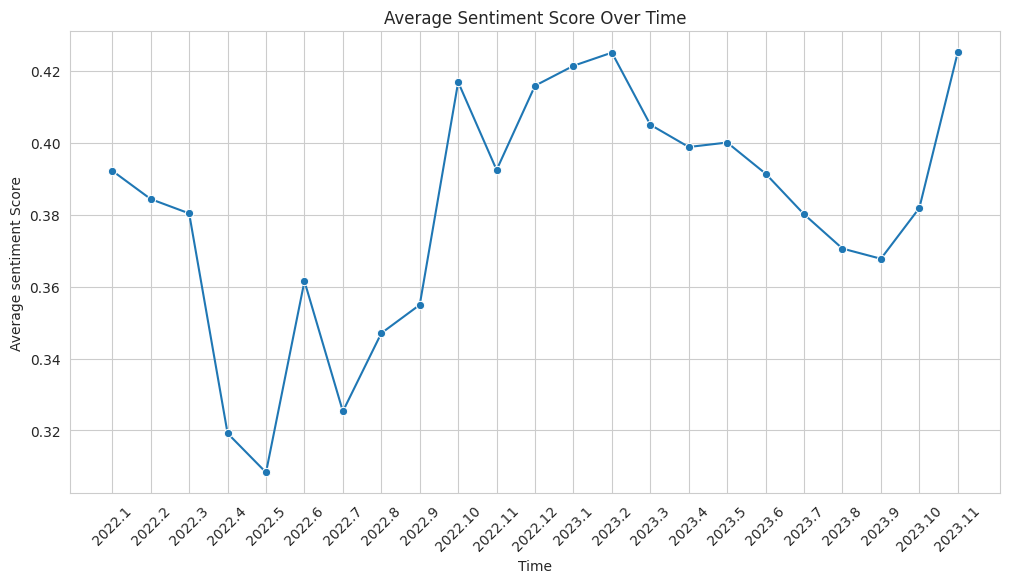

In [62]:
# Group by unique months in each year and calculate the mean score
grouped_df = df_busu.groupby([df_busu['year'], df_busu['month_num']])['sentiment_val'].mean().reset_index()
grouped_df['year_month'] = grouped_df['year'].astype(str)+"."+grouped_df['month_num'].astype(str)
# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='sentiment_val', data=grouped_df, marker='o')

plt.xlabel('Time')
plt.ylabel('Average sentiment Score')
plt.title(f"Average Sentiment Score Over Time")
plt.xticks(rotation=45)
plt.show()

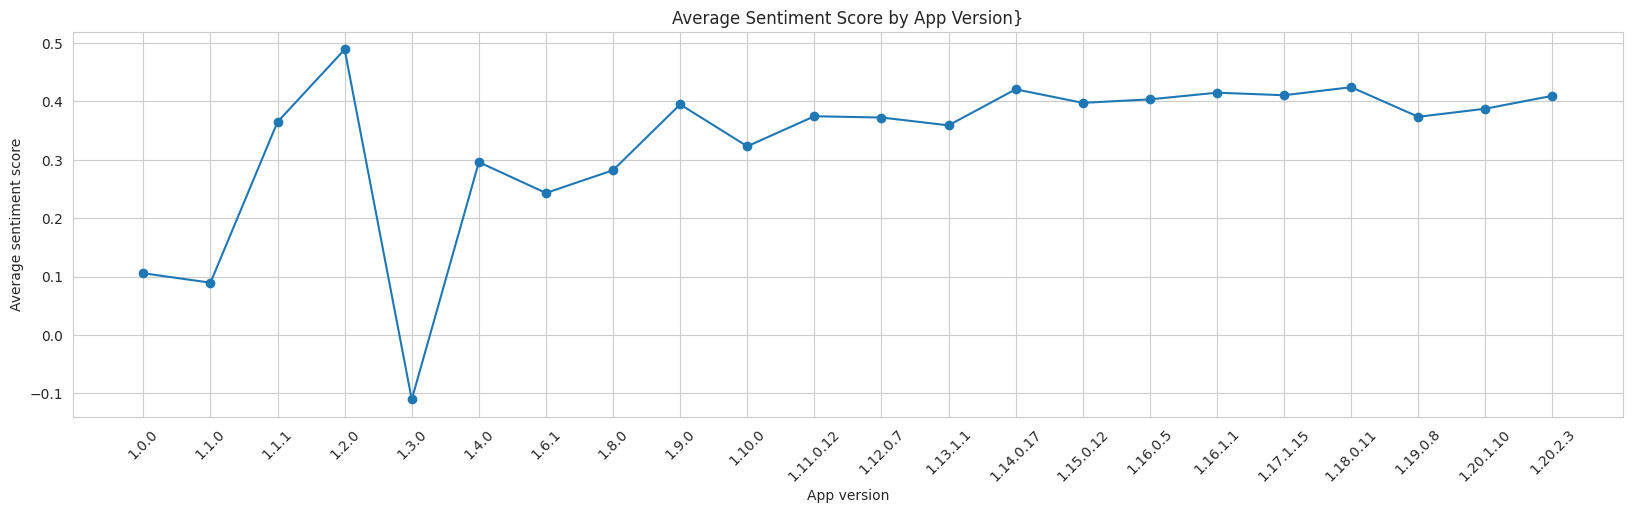

In [115]:
def version_to_int(version):
    major, minor, tiny, *build = map(int, version.split("."))
    build[0] if build else 0
    
    major = (major << 24) & 0xFF000000
    minor = (minor << 16) & 0x00FF0000
    tiny = (tiny << 12) & 0x0000F000
    build = build[0] & 0x00000FFF if build else 0
    return int(major | minor | tiny | build)

df2 = pd.DataFrame(df_busu.groupby(['reviewCreatedVersion'])['sentiment_val'].mean()).reset_index()

df2['version_ordered'] = df2.reviewCreatedVersion.apply(version_to_int)

df2 = df2.sort_values(by='version_ordered', ascending=True)

plt.figure(figsize=(20, 5))
plt.plot(df2['reviewCreatedVersion'], df2['sentiment_val'], marker='o')
plt.xlabel('App version')
plt.ylabel('Average sentiment score')
plt.title('Average Sentiment Score by App Version}')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [64]:
df_1_3_0 = df_busu[df_busu['reviewCreatedVersion'] == '1.3.0']
df_1_3_0.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment,sentiment_val,time,month,month_num,year,month_year
8388,8388,8a93cfb4-35df-4f03-9a29-b0522eb57b5a,Hassan Salim,https://play-lh.googleusercontent.com/a-/ALV-U...,Excellent App,5,1,1.3.0,2022-11-23 22:28:36,NaN,NaN,1.3.0,Positive,0.5719,2022-11-23 22:28:36,November,11,2022,2022-11
9986,9986,c526bd8c-d2e2-421c-9b54-96a8a001efae,Aden Mukhtar sheikh abud,https://play-lh.googleusercontent.com/a-/ALV-U...,M.a,5,0,1.3.0,2022-09-19 08:19:01,NaN,NaN,1.3.0,Neutral,0.0000,2022-09-19 08:19:01,September,9,2022,2022-09
11038,11038,cae01a91-1afb-4ca6-b120-64f192fd96bf,Jane Kitonyi Kahia,https://play-lh.googleusercontent.com/a/ACg8oc...,Not bad use it,5,0,1.3.0,2022-08-08 22:51:09,NaN,NaN,1.3.0,Negative,-0.5423,2022-08-08 22:51:09,August,8,2022,2022-08
11722,11722,ae80034d-6e79-47dd-9ba3-8c9aa99d135d,kennedy rateng,https://play-lh.googleusercontent.com/a-/ALV-U...,Horrible and disgusting. The app have got bugs,1,0,1.3.0,2022-07-15 20:24:11,NaN,NaN,1.3.0,Negative,-0.7845,2022-07-15 20:24:11,July,7,2022,2022-07
12711,12711,0569a31e-bfd8-417c-9306-70dbc069ca34,talib mutongi,https://play-lh.googleusercontent.com/a-/ALV-U...,The app now keeps stopping! Cant use it.,4,0,1.3.0,2022-06-14 19:40:25,NaN,NaN,1.3.0,Negative,-0.2244,2022-06-14 19:40:25,June,6,2022,2022-06


Positive words


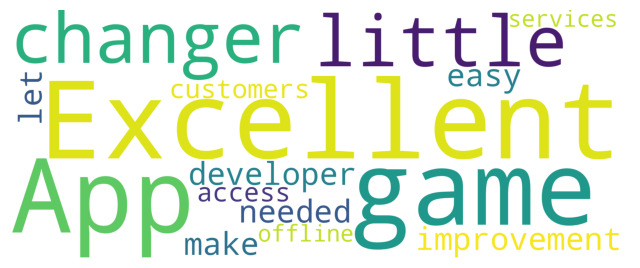

Negative words


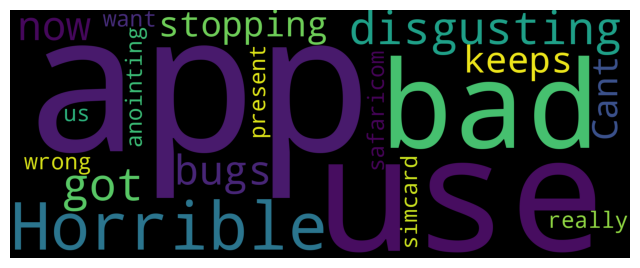

In [65]:
print("Positive words")
train_pos = df_1_3_0[df_1_3_0['sentiment'] == 'Positive']
train_neg = df_1_3_0[df_1_3_0['sentiment'] == 'Negative']
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

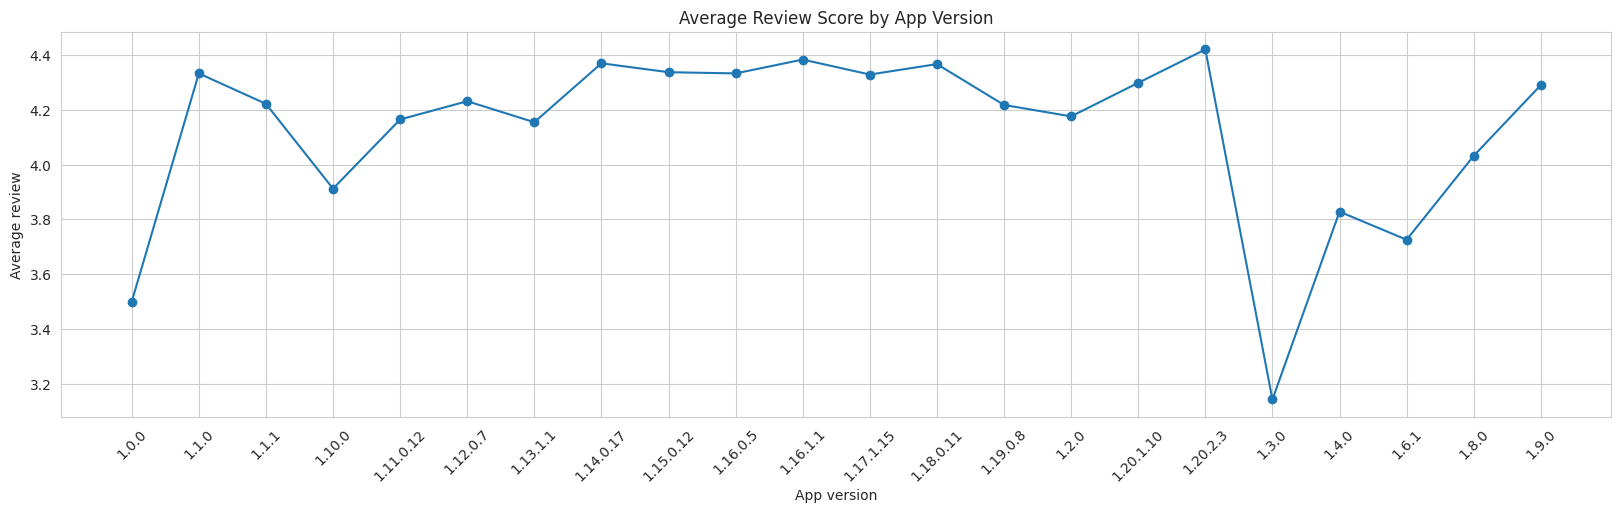

In [66]:
df3 = pd.DataFrame(df_busu.groupby('reviewCreatedVersion')['score'].mean()).reset_index()

plt.figure(figsize=(20, 5))
plt.plot(df3['reviewCreatedVersion'], df3['score'], marker='o')
plt.xlabel('App version')
plt.ylabel('Average review')
plt.title('Average Review Score by App Version')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [67]:
df3.head()

,reviewCreatedVersion,score
0,1.0.0,3.500000
1,1.1.0,4.333333
2,1.1.1,4.222222
3,1.10.0,3.912581
4,1.11.0.12,4.165205


**References:**

https://www.kaggle.com/code/ngyptr/python-nltk-sentiment-analysis
